In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [2]:
df = pd.read_csv(
    "C:/Users/ap5176/Data/quantata/data/2022-08-29-20-22-27.tsv",
    sep="\t",
    encoding="latin1"
)
df.head()

,Symbol,ClosingDay,NextDay,SharePrice,ClosingDayAfter1Q,NextDayAfter1Q,SharePriceAfter1Q,ShareCount,MarketCapital,NetWorth,...,GrossOperatingMargin,NetProfitMargin,ROCRatio,IncomeGrowth1Q,IncomeGrowth1Y,RevenueGrowth1Q,RevenueGrowth1Y,AssetsGrowth1Q,AssetsGrowth1Y,SharePriceGrowth
0,095570.KS,2021-12-31,2022-01-05,5320.000000,2022-03-31,2022-04-01,6190.0,44767800,2.381647e+11,3.639947e+11,...,0.065052,0.036560,0.025540,21.670266,-20.586358,0.279583,0.177524,0.008994,-0.146789,0.163534
1,095570.KS,2021-09-30,2021-10-01,5554.347656,2021-12-31,2022-01-05,5320.0,44767800,2.486559e+11,3.639947e+11,...,0.065052,0.036560,0.025540,21.670266,-20.586358,0.279583,0.177524,0.008994,-0.146789,-0.042192
2,282330.KS,2021-12-31,2022-01-05,142000.000000,2022-03-31,2022-04-01,174500.0,17275000,2.453050e+12,7.825517e+11,...,0.022285,0.015358,0.023770,-0.271353,0.203173,-0.029104,0.097050,0.033034,0.094978,0.228873
3,027410.KS,2021-12-31,2022-01-05,5290.000000,2022-03-31,2022-04-01,5320.0,95708800,5.062996e+11,1.552663e+12,...,0.010569,-0.054871,0.000687,-1.314457,1.405717,1.066975,0.339350,-0.014350,0.195041,0.005671
4,006840.KS,2021-12-31,2022-01-05,19750.000000,2022-03-31,2022-04-01,21950.0,13045500,2.576486e+11,5.742398e+11,...,-0.056586,-0.028238,-0.018162,-0.090780,-0.269456,0.008343,0.209056,-0.002690,0.095529,0.111392


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  11217 non-null  object 
 1   ClosingDay              11217 non-null  object 
 2   NextDay                 11217 non-null  object 
 3   SharePrice              11217 non-null  float64
 4   ClosingDayAfter1Q       11217 non-null  object 
 5   NextDayAfter1Q          11217 non-null  object 
 6   SharePriceAfter1Q       11217 non-null  float64
 7   ShareCount              11217 non-null  int64  
 8   MarketCapital           11217 non-null  float64
 9   NetWorth                11187 non-null  float64
 10  NetIncome               11217 non-null  float64
 11  TotalAssets             11052 non-null  float64
 12  TotalRevenue            11217 non-null  float64
 13  TotalCash               10978 non-null  float64
 14  TotalLiabilities        11050 non-null

In [4]:
df = df.replace((np.inf, -np.inf), np.nan).dropna().reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   9308 non-null   int64  
 1   Symbol                  9308 non-null   object 
 2   ClosingDay              9308 non-null   object 
 3   NextDay                 9308 non-null   object 
 4   SharePrice              9308 non-null   float64
 5   ClosingDayAfter1Q       9308 non-null   object 
 6   NextDayAfter1Q          9308 non-null   object 
 7   SharePriceAfter1Q       9308 non-null   float64
 8   ShareCount              9308 non-null   int64  
 9   MarketCapital           9308 non-null   float64
 10  NetWorth                9308 non-null   float64
 11  NetIncome               9308 non-null   float64
 12  TotalAssets             9308 non-null   float64
 13  TotalRevenue            9308 non-null   float64
 14  TotalCash               9308 non-null   

In [5]:
df.columns

Index(['index', 'Symbol', 'ClosingDay', 'NextDay', 'SharePrice',
       'ClosingDayAfter1Q', 'NextDayAfter1Q', 'SharePriceAfter1Q',
       'ShareCount', 'MarketCapital', 'NetWorth', 'NetIncome', 'TotalAssets',
       'TotalRevenue', 'TotalCash', 'TotalLiabilities', 'GrossProfit',
       'OperatingCashflow', 'OperatingIncome', 'EnterpriseValue',
       'EarningsBeforeInterest', 'CurrentLiabilities', 'EmployedCapital',
       'NetIncome1Y', 'NetIncomeBefore1Q', 'NetIncomeBefore1Y',
       'TotalRevenue1Y', 'TotalRevenueBefore1Q', 'TotalRevenueBefore1Y',
       'TotalAssets1Y', 'TotalAssetsBefore1Q', 'TotalAssetsBefore1Y',
       'PERatio', 'PBRatio', 'PSRatio', 'PCFRatio', 'EVEBITRatio',
       'EVSalesRatio', 'ROERatio', 'ROARatio', 'GPARatio', 'LARatio',
       'TurnoverRatio', 'GrossMargin', 'GrossOperatingMargin',
       'NetProfitMargin', 'ROCRatio', 'IncomeGrowth1Q', 'IncomeGrowth1Y',
       'RevenueGrowth1Q', 'RevenueGrowth1Y', 'AssetsGrowth1Q',
       'AssetsGrowth1Y', 'SharePric

In [6]:
features = [
    "PERatio", "PBRatio", "PSRatio", "PCFRatio", "EVEBITRatio",
    "EVSalesRatio", "ROERatio", "ROARatio", "GPARatio", "LARatio",
    "TurnoverRatio", "GrossMargin", "GrossOperatingMargin",
    "NetProfitMargin", "ROCRatio", "IncomeGrowth1Q", "IncomeGrowth1Y",
    "RevenueGrowth1Q", "RevenueGrowth1Y", "AssetsGrowth1Q",
    "AssetsGrowth1Y"
]

In [7]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[features])
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [8]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train, y_train)
y_pred_dtr = model_dtr.predict(x_test)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2_dtr = r2_score(y_test, y_pred_dtr)
print(rmse_dtr, r2_dtr)

0.32012330767378167 -0.7560028314542371


In [9]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(rmse_lr, r2_lr)

0.23750268650566936 0.033442547681333146


In [10]:
model_rfr = RandomForestRegressor()
model_rfr.fit(x_train, y_train)
y_pred_rfr = model_rfr.predict(x_test)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)
print(rmse_rfr, r2_rfr)

0.24795415711350072 -0.05349725537364858


In [11]:
for importance, feature in sorted(zip(model_dtr.feature_importances_, features), reverse=True):
    print(feature, importance)

EVSalesRatio 0.12223745314784572
ROCRatio 0.1189406466879033
PCFRatio 0.07530908690837865
PBRatio 0.07441498194362775
EVEBITRatio 0.06699648377600313
PERatio 0.06149833721714756
PSRatio 0.053315984405991876
ROERatio 0.04834105053462194
IncomeGrowth1Y 0.04472367231002865
AssetsGrowth1Q 0.041941298472367085
ROARatio 0.04002800546439994
IncomeGrowth1Q 0.036662670995684814
RevenueGrowth1Q 0.03386329551901049
RevenueGrowth1Y 0.02947891578173562
AssetsGrowth1Y 0.028568219357270257
LARatio 0.026473218086503436
GrossMargin 0.025142769178574526
TurnoverRatio 0.02064715219263203
GPARatio 0.01964587506835465
GrossOperatingMargin 0.01689614633652711
NetProfitMargin 0.014874736615391466


In [12]:
for importance, feature in sorted(zip(abs(model_lr.coef_), features), reverse=True):
    print(feature, importance)

NetProfitMargin 8.92067264780202
GrossOperatingMargin 6.3523189830799724
EVSalesRatio 2.783192331097791
ROARatio 2.0571365721760873
AssetsGrowth1Y 0.49347772715974975
RevenueGrowth1Q 0.3697899572605428
LARatio 0.34650043827153953
GPARatio 0.33744101271849536
PERatio 0.3033521037265596
IncomeGrowth1Y 0.2885313819429283
AssetsGrowth1Q 0.27898116613086793
GrossMargin 0.24150377494765024
PBRatio 0.24057612185079658
ROERatio 0.23000377022813898
PCFRatio 0.1223061818055255
EVEBITRatio 0.1025281182210498
TurnoverRatio 0.0835873744764918
ROCRatio 0.07719557167364914
RevenueGrowth1Y 0.06349467422321643
PSRatio 0.04896177801150722
IncomeGrowth1Q 0.0038129877775554466


In [13]:
for importance, feature in sorted(zip(model_rfr.feature_importances_, features), reverse=True):
    print(feature, importance)

ROCRatio 0.09653551892885277
PBRatio 0.07367225157463879
EVEBITRatio 0.06255988957090766
PCFRatio 0.06043209692486354
PERatio 0.05992090187249551
AssetsGrowth1Y 0.05413587396752233
PSRatio 0.05392547176776095
AssetsGrowth1Q 0.05147373676956746
EVSalesRatio 0.050260481426804046
ROARatio 0.04992155898195774
IncomeGrowth1Q 0.048998157833838665
GrossOperatingMargin 0.045497682961333066
RevenueGrowth1Q 0.03874391280406268
RevenueGrowth1Y 0.038405535670066125
IncomeGrowth1Y 0.03729576245530037
ROERatio 0.03511284185183051
LARatio 0.033680633646052366
GPARatio 0.028786720552936337
GrossMargin 0.02837674924990479
TurnoverRatio 0.027540306513163363
NetProfitMargin 0.024723914676141


In [14]:
features_4p = ["PERatio", "PBRatio", "PSRatio", "PCFRatio"]

In [15]:
min_max_scaler_4p = MinMaxScaler()
x_scaled_4p = min_max_scaler_4p.fit_transform(df[features_4p])
x_train_4p, x_test_4p, y_train_4p, y_test_4p = train_test_split(
    x_scaled_4p,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [16]:
model_rfr_4p = RandomForestRegressor()
model_rfr_4p.fit(x_train_4p, y_train_4p)
y_pred_rfr_4p = model_rfr_4p.predict(x_test_4p)
rmse_rfr_4p = np.sqrt(mean_squared_error(y_test_4p, y_pred_rfr_4p))
r2_rfr_4p = r2_score(y_test_4p, y_pred_rfr_4p)
print(rmse_rfr_4p, r2_rfr_4p)

0.2587656175055472 0.020358893967994285


In [17]:
for importance, feature in sorted(zip(model_rfr_4p.feature_importances_, features_4p), reverse=True):
    print(feature, importance)

PERatio 0.31471892475887336
PBRatio 0.23808929742885568
PSRatio 0.22364318195739666
PCFRatio 0.2235485958548743


<AxesSubplot:>

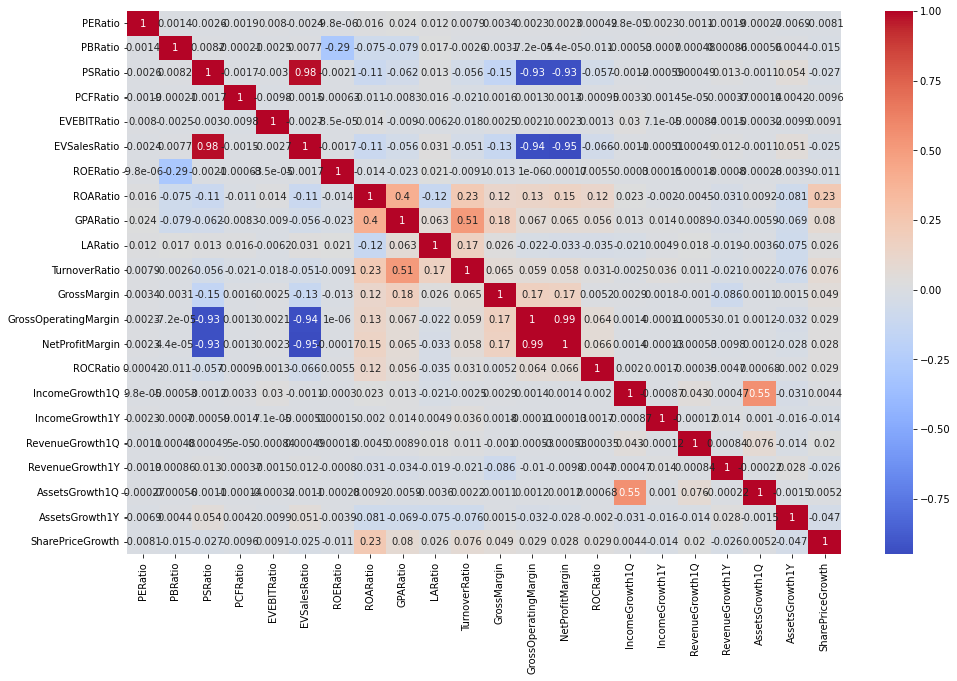

In [18]:
plt.figure(figsize=(16, 10))
sns.heatmap(df[features + ["SharePriceGrowth"]].corr(), annot=True, cmap="coolwarm")

In [19]:
features_low_corr = [
    "PERatio", "PBRatio", "PSRatio", "PCFRatio", "EVEBITRatio",
    "EVSalesRatio", "GPARatio", "LARatio",
    "IncomeGrowth1Q", "IncomeGrowth1Y",
    "RevenueGrowth1Y",
    "AssetsGrowth1Y"
]

In [20]:
min_max_scaler_low_corr = MinMaxScaler()
x_scaled_low_corr = min_max_scaler_low_corr.fit_transform(df[features_low_corr])
x_train_low_corr, x_test_low_corr, y_train_low_corr, y_test_low_corr = train_test_split(
    x_scaled_low_corr,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [21]:
model_rfr_low_corr = RandomForestRegressor()
model_rfr_low_corr.fit(x_train_low_corr, y_train_low_corr)
y_pred_rfr_low_corr = model_rfr_low_corr.predict(x_test_low_corr)
rmse_rfr_low_corr = np.sqrt(mean_squared_error(y_test_low_corr, y_pred_rfr_low_corr))
r2_rfr_low_corr = r2_score(y_test_low_corr, y_pred_rfr_low_corr)
print(rmse_rfr_low_corr, r2_rfr_low_corr)

0.27418053543559007 0.014593186416434256


In [22]:
for importance, feature in sorted(zip(model_rfr_low_corr.feature_importances_, features_low_corr), reverse=True):
    print(feature, importance)

EVEBITRatio 0.18067318092211676
PBRatio 0.0918789014100028
PERatio 0.08587064028750713
PSRatio 0.0796118984214224
PCFRatio 0.07904316370468385
AssetsGrowth1Y 0.07752825862580849
RevenueGrowth1Y 0.07666580466480209
IncomeGrowth1Y 0.07181296455627147
IncomeGrowth1Q 0.0679036140952198
EVSalesRatio 0.06687435413340657
GPARatio 0.06356454885415015
LARatio 0.05857267032460838


In [23]:
y_categorized = (df["SharePriceGrowth"] > 0) * 1

In [24]:
x_train_categorized, x_test_categorized, y_train_categorized, y_test_categorized = train_test_split(
    x_scaled,
    y_categorized,
    test_size=0.25,
    shuffle=True,
)

In [25]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train_categorized, y_train_categorized)
y_pred_dtc = model_dtc.predict(x_test_categorized)
acc_dtc = accuracy_score(y_test_categorized, y_pred_dtc)
roc_auc_dtc = roc_auc_score(y_test_categorized, y_pred_dtc)
f1_dtc = f1_score(y_test_categorized, y_pred_dtc)
print(acc_dtc, roc_auc_dtc, f1_dtc)

0.5608079071766222 0.5283156135766842 0.40093786635404455


In [26]:
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train_categorized, y_train_categorized)
y_pred_rfc = model_rfc.predict(x_test_categorized)
acc_rfc = accuracy_score(y_test_categorized, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test_categorized, y_pred_rfc)
f1_rfc = f1_score(y_test_categorized, y_pred_rfc)
print(acc_rfc, roc_auc_rfc, f1_rfc)

0.5956166738289643 0.5457188396712521 0.3964079538165491


In [27]:
model_lrc = LogisticRegression()
model_lrc.fit(x_train_categorized, y_train_categorized)
y_pred_lrc = model_lrc.predict(x_test_categorized)
acc_lrc = accuracy_score(y_test_categorized, y_pred_lrc)
roc_auc_lrc = roc_auc_score(y_test_categorized, y_pred_lrc)
f1_lrc = f1_score(y_test_categorized, y_pred_lrc)
print(acc_lrc, roc_auc_lrc, f1_lrc)

0.6489041684572411 0.5001437175924948 0.009696969696969697


In [28]:
conf_mat = confusion_matrix(y_test_categorized, y_pred_lrc)
conf_mat

array([[1506,    7],
       [ 810,    4]], dtype=int64)

In [29]:
model_vc = VotingClassifier([("DTC", DecisionTreeClassifier()), ("RFC", RandomForestClassifier()), ("LRC", LogisticRegression())])
model_vc.fit(x_train_categorized, y_train_categorized)
y_pred_vc = model_vc.predict(x_test_categorized)
acc_vc = accuracy_score(y_test_categorized, y_pred_vc)
roc_auc_vc = roc_auc_score(y_test_categorized, y_pred_vc)
f1_vc = f1_score(y_test_categorized, y_pred_vc)
print(acc_vc, roc_auc_vc, f1_vc)

0.6033519553072626 0.537478219071081 0.35947258848022207


In [30]:
x_train_categorized_4p, x_test_categorized_4p, y_train_categorized_4p, y_test_categorized_4p = train_test_split(
    x_scaled_4p,
    y_categorized,
    test_size=0.25,
    shuffle=True,
)

In [31]:
model_dtc_4p = DecisionTreeClassifier()
model_dtc_4p.fit(x_train_categorized_4p, y_train_categorized_4p)
y_pred_dtc_4p = model_dtc_4p.predict(x_test_categorized_4p)
acc_dtc_4p = accuracy_score(y_test_categorized_4p, y_pred_dtc_4p)
roc_auc_dtc_4p = roc_auc_score(y_test_categorized_4p, y_pred_dtc_4p)
f1_dtc_4p = f1_score(y_test_categorized_4p, y_pred_dtc_4p)
print(acc_dtc_4p, roc_auc_dtc_4p, f1_dtc_4p)

0.5810055865921788 0.5444152317913058 0.41371016235718583


In [32]:
quartiles = {column: np.percentile(df[column], [10, 90]) for column in features}
df_dropped = df.copy()
for column, (quartile1, quartile3) in quartiles.items():
    df_dropped = df_dropped[(quartile1 <= df_dropped[column]) & (df_dropped[column] <= quartile3)]
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 67 to 9286
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   799 non-null    int64  
 1   Symbol                  799 non-null    object 
 2   ClosingDay              799 non-null    object 
 3   NextDay                 799 non-null    object 
 4   SharePrice              799 non-null    float64
 5   ClosingDayAfter1Q       799 non-null    object 
 6   NextDayAfter1Q          799 non-null    object 
 7   SharePriceAfter1Q       799 non-null    float64
 8   ShareCount              799 non-null    int64  
 9   MarketCapital           799 non-null    float64
 10  NetWorth                799 non-null    float64
 11  NetIncome               799 non-null    float64
 12  TotalAssets             799 non-null    float64
 13  TotalRevenue            799 non-null    float64
 14  TotalCash               799 non-null    

In [33]:
quartiles = {column: np.percentile(df[column], [10, 90]) for column in [
    "PERatio", "PBRatio", "PSRatio", "PCFRatio", "EVEBITRatio",
    "EVSalesRatio", "ROERatio", "ROARatio", "GPARatio", "LARatio",
    "TurnoverRatio", "GrossMargin", "GrossOperatingMargin",
    "NetProfitMargin", "ROCRatio"]}
df_dropped = df.copy()
for column, (quartile1, quartile3) in quartiles.items():
    df_dropped = df_dropped[(df_dropped[column] > quartile1) & (df_dropped[column] < quartile3)]
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 22 to 9286
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1668 non-null   int64  
 1   Symbol                  1668 non-null   object 
 2   ClosingDay              1668 non-null   object 
 3   NextDay                 1668 non-null   object 
 4   SharePrice              1668 non-null   float64
 5   ClosingDayAfter1Q       1668 non-null   object 
 6   NextDayAfter1Q          1668 non-null   object 
 7   SharePriceAfter1Q       1668 non-null   float64
 8   ShareCount              1668 non-null   int64  
 9   MarketCapital           1668 non-null   float64
 10  NetWorth                1668 non-null   float64
 11  NetIncome               1668 non-null   float64
 12  TotalAssets             1668 non-null   float64
 13  TotalRevenue            1668 non-null   float64
 14  TotalCash               1668 non-null  

<AxesSubplot:>

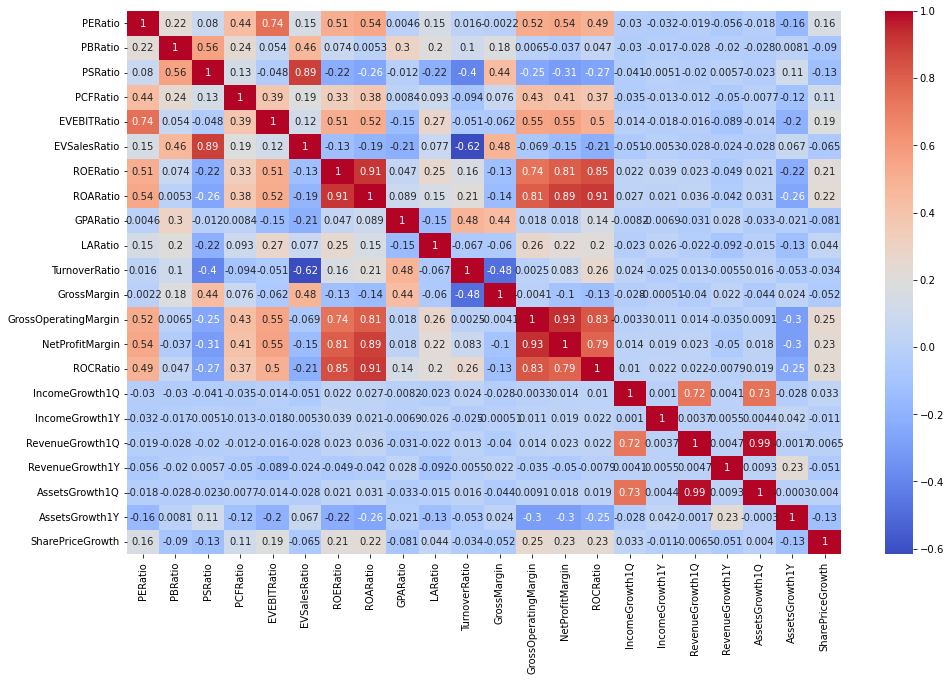

In [34]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_dropped[features + ["SharePriceGrowth"]].corr(), annot=True, cmap="coolwarm")

In [35]:
y_categorized_dropped = (df_dropped["SharePriceGrowth"] > 0) * 1

In [36]:
min_max_scaler = MinMaxScaler()
x_scaled_dropped = min_max_scaler.fit_transform(df_dropped[features])
x_train_dropped, x_test_dropped, y_train_dropped, y_test_dropped = train_test_split(
    x_scaled_dropped,
    y_categorized_dropped,
    test_size=0.25,
    shuffle=True,
)

In [37]:
model_dtc_dropped = DecisionTreeClassifier()
model_dtc_dropped.fit(x_train_dropped, y_train_dropped)
y_pred_dtc_dropped = model_dtc_dropped.predict(x_test_dropped)
acc_dtc_dropped = accuracy_score(y_test_dropped, y_pred_dtc_dropped)
roc_auc_dtc_dropped = roc_auc_score(y_test_dropped, y_pred_dtc_dropped)
f1_dtc_dropped = f1_score(y_test_dropped, y_pred_dtc_dropped)
print(acc_dtc_dropped, roc_auc_dtc_dropped, f1_dtc_dropped)

0.5371702637889688 0.5328412494651262 0.47411444141689374


In [38]:
model_rfc_dropped = RandomForestClassifier()
model_rfc_dropped.fit(x_train_dropped, y_train_dropped)
y_pred_rfc_dropped = model_rfc_dropped.predict(x_test_dropped)
acc_rfc_dropped = accuracy_score(y_test_dropped, y_pred_rfc_dropped)
roc_auc_rfc_dropped = roc_auc_score(y_test_dropped, y_pred_rfc_dropped)
f1_rfc_dropped = f1_score(y_test_dropped, y_pred_rfc_dropped)
print(acc_rfc_dropped, roc_auc_rfc_dropped, f1_rfc_dropped)

0.5275779376498801 0.5175795179004422 0.44507042253521123


In [39]:
model_lrc_dropped = LogisticRegression()
model_lrc_dropped.fit(x_train_dropped, y_train_dropped)
y_pred_lrc_dropped = model_lrc_dropped.predict(x_test_dropped)
acc_lrc_dropped = accuracy_score(y_test_dropped, y_pred_lrc_dropped)
roc_auc_lrc_dropped = roc_auc_score(y_test_dropped, y_pred_lrc_dropped)
f1_lrc_dropped = f1_score(y_test_dropped, y_pred_lrc_dropped)
print(acc_lrc_dropped, roc_auc_lrc_dropped, f1_lrc_dropped)

0.5635491606714629 0.5400442162316359 0.4347826086956521


In [40]:
model_vc_dropped = VotingClassifier([("DTC", DecisionTreeClassifier()), ("RFC", RandomForestClassifier()), ("LRC", LogisticRegression())])
model_vc_dropped.fit(x_train_dropped, y_train_dropped)
y_pred_vc_dropped = model_vc_dropped.predict(x_test_dropped)
acc_vc_dropped = accuracy_score(y_test_dropped, y_pred_vc_dropped)
roc_auc_vc_dropped = roc_auc_score(y_test_dropped, y_pred_vc_dropped)
f1_vc_dropped = f1_score(y_test_dropped, y_pred_vc_dropped)
print(acc_vc_dropped, roc_auc_vc_dropped, f1_vc_dropped)

0.5371702637889688 0.5239266866352874 0.4438040345821326


In [41]:
features_5f = ["PERatio", "PCFRatio", "EVEBITRatio", "ROARatio", "ROCRatio"]

In [42]:
min_max_scaler_5f = MinMaxScaler()
x_scaled_dropped_5f = min_max_scaler_5f.fit_transform(df_dropped[features_5f])
x_train_dropped_5f, x_test_dropped_5f, y_train_dropped_5f, y_test_dropped_5f = train_test_split(
    x_scaled_dropped_5f,
    y_categorized_dropped,
    test_size=0.25,
    shuffle=True,
)

In [43]:
model_dtc_dropped_5f = DecisionTreeClassifier()
model_dtc_dropped_5f.fit(x_train_dropped_5f, y_train_dropped_5f)
y_pred_dtc_dropped_5f = model_dtc_dropped_5f.predict(x_test_dropped_5f)
acc_dtc_dropped_5f = accuracy_score(y_test_dropped_5f, y_pred_dtc_dropped_5f)
roc_auc_dtc_dropped_5f = roc_auc_score(y_test_dropped_5f, y_pred_dtc_dropped_5f)
f1_dtc_dropped_5f = f1_score(y_test_dropped_5f, y_pred_dtc_dropped_5f)
print(acc_dtc_dropped_5f, roc_auc_dtc_dropped_5f, f1_dtc_dropped_5f)

0.580335731414868 0.5613955703738985 0.4712990936555892


In [44]:
print(sorted([(coef, feature) for coef, feature in zip(model_lrc_dropped.coef_[0], features)]))

[(-0.9923788848682197, 'PSRatio'), (-0.9116470262455526, 'TurnoverRatio'), (-0.8277715400469536, 'RevenueGrowth1Y'), (-0.5775591160083532, 'AssetsGrowth1Y'), (-0.5120861576284543, 'PBRatio'), (-0.4485226855528014, 'GPARatio'), (-0.40645681425797453, 'IncomeGrowth1Y'), (-0.1862713557908286, 'RevenueGrowth1Q'), (-0.1523401338317532, 'EVSalesRatio'), (-0.14920560435820854, 'GrossMargin'), (-0.09463249480542474, 'PCFRatio'), (-0.035508437286363916, 'AssetsGrowth1Q'), (0.03572768718623719, 'ROERatio'), (0.26369375052180705, 'NetProfitMargin'), (0.31741863319599817, 'PERatio'), (0.3339332604089854, 'ROARatio'), (0.4112808249429296, 'LARatio'), (0.5681715820775962, 'IncomeGrowth1Q'), (0.5989898915226872, 'EVEBITRatio'), (0.6518360912371987, 'ROCRatio'), (0.7234095947723342, 'GrossOperatingMargin')]


In [45]:
print(sorted([(coef, feature) for coef, feature in zip(model_rfc_dropped.feature_importances_, features)]))

[(0.03271042913864538, 'TurnoverRatio'), (0.03309789821692569, 'NetProfitMargin'), (0.034865252246419454, 'ROERatio'), (0.03562016952289203, 'LARatio'), (0.03672442427321914, 'RevenueGrowth1Q'), (0.03784989400849725, 'IncomeGrowth1Y'), (0.03799144589358305, 'AssetsGrowth1Q'), (0.03820098171920799, 'GrossMargin'), (0.03893727134835364, 'ROARatio'), (0.04016284129646289, 'RevenueGrowth1Y'), (0.04071295295882734, 'IncomeGrowth1Q'), (0.04150930471501294, 'AssetsGrowth1Y'), (0.042523450022696696, 'GrossOperatingMargin'), (0.04286023888926582, 'ROCRatio'), (0.043934164970431844, 'GPARatio'), (0.06402029311427289, 'EVSalesRatio'), (0.06810536431040373, 'PBRatio'), (0.06917865685956656, 'PSRatio'), (0.07201085061817643, 'PERatio'), (0.07342649178848057, 'EVEBITRatio'), (0.07555762408865885, 'PCFRatio')]


In [46]:
print(sorted([(coef, feature) for coef, feature in zip(model_dtc_dropped.feature_importances_, features)]))

[(0.009543527350828822, 'ROARatio'), (0.013246345572975764, 'ROERatio'), (0.01572280079053427, 'GrossOperatingMargin'), (0.016669620735738338, 'AssetsGrowth1Q'), (0.018908950222603773, 'LARatio'), (0.019818927767074546, 'GPARatio'), (0.02064438453167011, 'NetProfitMargin'), (0.02677212000977061, 'IncomeGrowth1Y'), (0.02858509699743531, 'IncomeGrowth1Q'), (0.028824491338829524, 'GrossMargin'), (0.029611844688831112, 'RevenueGrowth1Q'), (0.033486686459901514, 'AssetsGrowth1Y'), (0.034048643858136045, 'TurnoverRatio'), (0.04255588281880552, 'RevenueGrowth1Y'), (0.06924183575473293, 'ROCRatio'), (0.07240979454047418, 'EVSalesRatio'), (0.08527363497986781, 'PERatio'), (0.09245348341289564, 'PSRatio'), (0.09805215235143262, 'EVEBITRatio'), (0.10955358283399812, 'PCFRatio'), (0.13457619298346327, 'PBRatio')]


In [47]:
# PSRatio PBRatio PERatio PCFRatio EVSalesRatio ROCRatio EVEBITRatio AssetsGrowth1Q TurnoverRatio LARatio
# EVEBITRatio PCFRatio PERatio PBRatio PSRatio EVSalesRatio ROCRatio GrossOperatingMargin GPARatio RevenueGrowth1Q
# AssetsGrowth1Y PERatio AssetsGrowth1Q PBRatio PSRatio RevenueGrowth1Y RevenueGrowth1Q PCFRatio EVEBITRatio EVSalesRatio
features_8f = ["PSRatio", "PBRatio", "PERatio", "PCFRatio", "EVSalesRatio", "EVEBITRatio", "ROCRatio", "ROARatio"]


In [48]:
min_max_scaler_8f = MinMaxScaler()
x_scaled_dropped_8f = min_max_scaler_8f.fit_transform(df_dropped[features_8f])
x_train_dropped_8f, x_test_dropped_8f, y_train_dropped_8f, y_test_dropped_8f = train_test_split(
    x_scaled_dropped_8f,
    y_categorized_dropped,
    test_size=0.25,
    shuffle=True,
)

In [49]:
model_dtc_dropped_8f = DecisionTreeClassifier()
model_dtc_dropped_8f.fit(x_train_dropped_8f, y_train_dropped_8f)
y_pred_dtc_dropped_8f = model_dtc_dropped_8f.predict(x_test_dropped_8f)
acc_dtc_dropped_8f = accuracy_score(y_test_dropped_8f, y_pred_dtc_dropped_8f)
roc_auc_dtc_dropped_8f = roc_auc_score(y_test_dropped_8f, y_pred_dtc_dropped_8f)
f1_dtc_dropped_8f = f1_score(y_test_dropped_8f, y_pred_dtc_dropped_8f)
print(acc_dtc_dropped_8f, roc_auc_dtc_dropped_8f, f1_dtc_dropped_8f)

0.5323741007194245 0.525570968193919 0.46866485013623976


In [50]:
model_lrc_dropped_8f = LogisticRegression()
model_lrc_dropped_8f.fit(x_train_dropped_8f, y_train_dropped_8f)
y_pred_lrc_dropped_8f = model_lrc_dropped_8f.predict(x_test_dropped_8f)
acc_lrc_dropped_8f = accuracy_score(y_test_dropped_8f, y_pred_lrc_dropped_8f)
roc_auc_lrc_dropped_8f = roc_auc_score(y_test_dropped_8f, y_pred_lrc_dropped_8f)
f1_lrc_dropped_8f = f1_score(y_test_dropped_8f, y_pred_lrc_dropped_8f)
print(acc_lrc_dropped_8f, roc_auc_lrc_dropped_8f, f1_lrc_dropped_8f)

0.565947242206235 0.5185652234832563 0.20960698689956334


In [51]:
model_vc_dropped_8f = VotingClassifier([("DTC", DecisionTreeClassifier()), ("RFC", RandomForestClassifier()), ("LRC", LogisticRegression())], voting="soft")
model_vc_dropped_8f.fit(x_train_dropped_8f, y_train_dropped_8f)
y_pred_vc_dropped_8f = model_vc_dropped_8f.predict(x_test_dropped_8f)
acc_vc_dropped_8f = accuracy_score(y_test_dropped_8f, y_pred_vc_dropped_8f)
roc_auc_vc_dropped_8f = roc_auc_score(y_test_dropped_8f, y_pred_vc_dropped_8f)
f1_vc_dropped_8f = f1_score(y_test_dropped_8f, y_pred_vc_dropped_8f)
print(acc_vc_dropped_8f, roc_auc_vc_dropped_8f, f1_vc_dropped_8f)

0.5443645083932853 0.5362547288776798 0.47513812154696133


c:\Users\ap5176\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AssetsGrowth1Y', ylabel='SharePriceGrowth'>

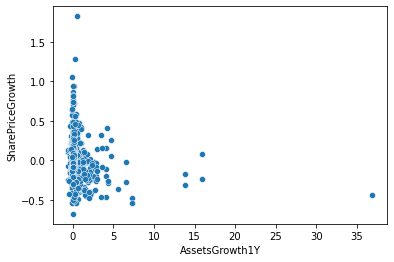

In [52]:
sns.scatterplot(df_dropped.AssetsGrowth1Y, df_dropped.SharePriceGrowth)

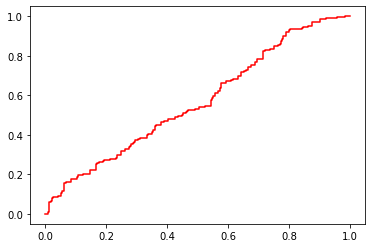

In [53]:
prob = model_vc_dropped_8f.predict_proba(x_test_dropped_8f)[:, 1]
fper, tper, thresholds = roc_curve(y_test_dropped_8f, prob)
plt.plot(fper, tper, color='red', label='ROC')

In [54]:
df_end = df_dropped.copy()
quartile1, quartile3 = np.percentile(df_end.SharePriceGrowth, [25, 75])
df_end = df_end[(df_end.SharePriceGrowth < quartile1) | (df_end.SharePriceGrowth > quartile3)]
df_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 22 to 9253
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   834 non-null    int64  
 1   Symbol                  834 non-null    object 
 2   ClosingDay              834 non-null    object 
 3   NextDay                 834 non-null    object 
 4   SharePrice              834 non-null    float64
 5   ClosingDayAfter1Q       834 non-null    object 
 6   NextDayAfter1Q          834 non-null    object 
 7   SharePriceAfter1Q       834 non-null    float64
 8   ShareCount              834 non-null    int64  
 9   MarketCapital           834 non-null    float64
 10  NetWorth                834 non-null    float64
 11  NetIncome               834 non-null    float64
 12  TotalAssets             834 non-null    float64
 13  TotalRevenue            834 non-null    float64
 14  TotalCash               834 non-null    

In [55]:
y_categorized_end = (df_end["SharePriceGrowth"] > 0) * 1

In [56]:
min_max_scaler = MinMaxScaler()
x_scaled_end = min_max_scaler.fit_transform(df_end[features])
x_train_end, x_test_end, y_train_end, y_test_end = train_test_split(
    x_scaled_end,
    y_categorized_end,
    test_size=0.25,
    shuffle=True,
)

In [57]:
model_vc_end = VotingClassifier([("DTC", DecisionTreeClassifier()), ("RFC", RandomForestClassifier()), ("LRC", LogisticRegression())], voting="soft")
model_vc_end.fit(x_train_end, y_train_end)
y_pred_vc_end = model_vc_end.predict(x_test_end)
acc_vc_end = accuracy_score(y_test_end, y_pred_vc_end)
roc_auc_vc_end = roc_auc_score(y_test_end, y_pred_vc_end)
f1_vc_end = f1_score(y_test_end, y_pred_vc_end)
print(acc_vc_end, roc_auc_vc_end, f1_vc_end)

0.6076555023923444 0.61010267693436 0.585858585858586


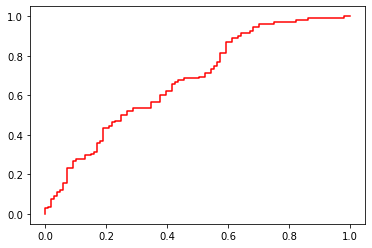

In [58]:
prob = model_vc_end.predict_proba(x_test_end)[:, 1]
fper, tper, thresholds = roc_curve(y_test_end, prob)
plt.plot(fper, tper, color='red', label='ROC')

In [59]:
min_max_scaler_8f = MinMaxScaler()
x_scaled_end_8f = min_max_scaler_8f.fit_transform(df_end[features_8f])
x_train_end_8f, x_test_end_8f, y_train_end_8f, y_test_end_8f = train_test_split(
    x_scaled_end_8f,
    y_categorized_end,
    test_size=0.25,
    shuffle=True,
)

In [60]:
model_vc_end_8f = VotingClassifier([("DTC", DecisionTreeClassifier()), ("RFC", RandomForestClassifier()), ("LRC", LogisticRegression())], voting="soft")
model_vc_end_8f.fit(x_train_end_8f, y_train_end_8f)
y_pred_vc_end_8f = model_vc_end_8f.predict(x_test_end_8f)
acc_vc_end_8f = accuracy_score(y_test_end_8f, y_pred_vc_end_8f)
roc_auc_vc_end_8f = roc_auc_score(y_test_end_8f, y_pred_vc_end_8f)
f1_vc_end_8f = f1_score(y_test_end_8f, y_pred_vc_end_8f)
print(acc_vc_end_8f, roc_auc_vc_end_8f, f1_vc_end_8f)

0.6172248803827751 0.6180044182621502 0.6039603960396039


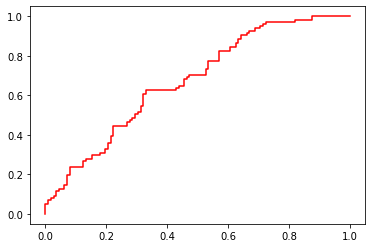

In [61]:
prob = model_vc_end_8f.predict_proba(x_test_end_8f)[:, 1]
fper, tper, thresholds = roc_curve(y_test_end_8f, prob)
plt.plot(fper, tper, color='red', label='ROC')

c:\Users\ap5176\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROARatio', ylabel='SharePriceGrowth'>

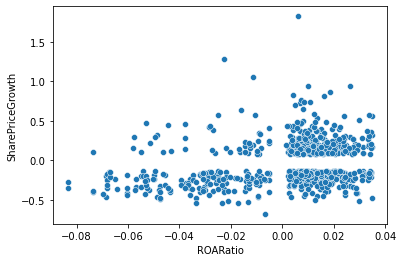

In [62]:
sns.scatterplot(df_end.ROARatio, df_end.SharePriceGrowth)

<AxesSubplot:>

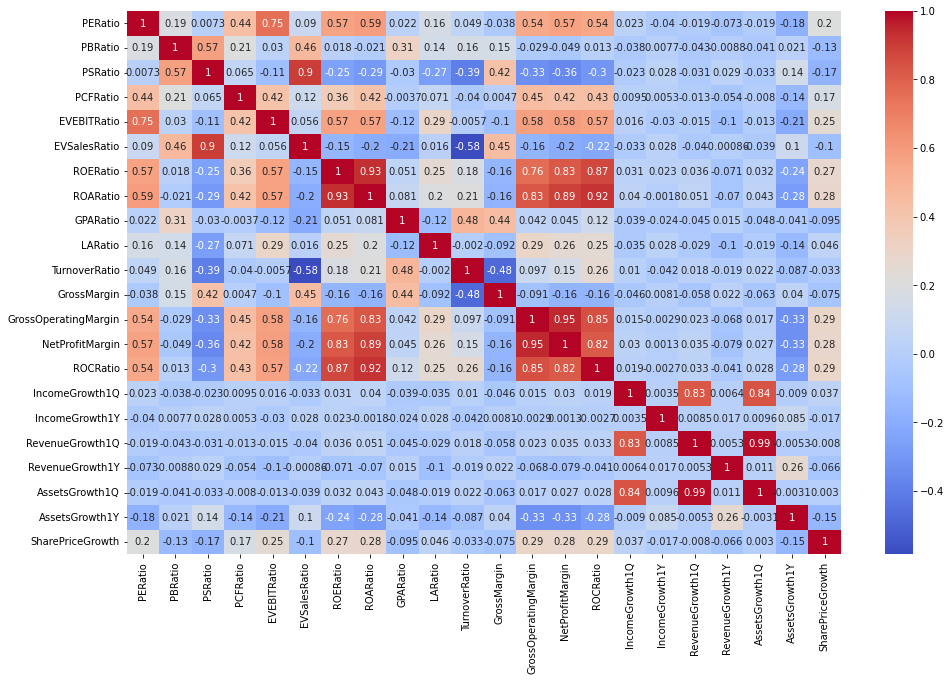

In [63]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_end[features + ["SharePriceGrowth"]].corr(), annot=True, cmap="coolwarm")